In [1]:
using NLsolve
#using Plots
using BenchmarkTools
using Distributed
if nprocs() == 1
#    addprocs(7)
end
@everywhere using SharedArrays
@everywhere configFile = "config.toml"
@everywhere include("src/ladderDGA_Julia.jl")

[ Info: Reading Fortran Input, this can take several minutes.
[ Info: Done Reading Gamma
[ Info: Done Reading chi


Writing HDF5 (vars.jdl) and Fortran (fortran_out/) output.


‚îå Info: loading from 
‚îî   env.inputVars = "vars.jld"
‚îå Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
‚îî @ Main ~/Hamburg/ladderDGA_Julia/src/helpers.jl:176
‚îå Info: Inputs Read. Starting Computation.
‚îÇ Found usable intervals for local susceptibility of length 
‚îÇ       sp: 37
‚îÇ       ch: 23 
‚îî       œáLoc_sp = 0.4226, œáLoc_ch = 0.0612


In [2]:
@time bubble = calc_bubble_fft(GLoc_fft, length(qIndices), modelParams, simParams);

  1.655670 seconds (3.35 M allocations: 261.873 MiB, 7.03% gc time)


In [7]:
ind = 10
gridShape = repeat([simParams.Nk], modelParams.D)
GLoc = flatten_2D(G_from_Œ£(Œ£_loc, œµkGrid, fft_range, modelParams));
GLoc_fft = Gfft_from_Œ£(Œ£_loc, œµkGrid, fft_range, modelParams);
res1 = ifft(fft(reshape(GLoc[ind,:], gridShape...)) .* fft(reshape(GLoc[ind+2,:], gridShape...)));
res2 = ifft(reshape(GLoc_fft[ind,:], gridShape...) .* reshape(GLoc_fft[ind+2,:], gridShape...));

In [45]:
testf(x) = (real.(sum(ifft(fft(reshape(GLoc[ind,:] .+ x, gridShape...)) .* fft(reshape(GLoc[ind+2,:], gridShape...)))) .- 0.5),imag.(sum(ifft(fft(reshape(GLoc[ind,:] .+ x, gridShape...)) .* fft(reshape(GLoc[ind+2,:], gridShape...))))));
testf2(x) = real.(sum(ifft(fft(reshape(GLoc[ind,:] .+ x, gridShape...)) .* fft(reshape(GLoc[ind+2,:], gridShape...)))));

In [46]:
testf2(1)

-14484.144294909827

In [12]:
using Zygote

In [47]:
h_tf1(y) = Zygote.hessian(testf,y)
h_tf2(y) = Zygote.gradient(testf2,y)

h_tf2 (generic function with 1 method)

In [48]:
h_tf2(0.1)

(3.000932835561798e-10 - 126455.59925073668im,)

In [58]:
include("src/ladderDGATools.jl")

Œ£_DMFT_correction (generic function with 0 methods)

In [51]:
f(x) = sum(calc_bubble_fft(GLoc_fft .+ x, length(qIndices), modelParams, simParams)) .- 20768.7
roots(f, -0.1..0.1)

MethodError: MethodError: no method matching Float64(::Interval{Float64})
Closest candidates are:
  Float64(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:200
  Float64(::T) where T<:Number at boot.jl:715
  Float64(!Matched::Int8) at float.jl:60
  ...

In [11]:
@time bubble = calc_bubble_fft(GLoc_fft, length(qIndices), modelParams, simParams);

on procs: 1
  0.083046 seconds (2.39 k allocations: 3.342 MiB)


In [18]:
@everywhere include("src/ladderDGATools.jl")
œásp, œásp_œâ, Œ≥sp, usable_sp = calc_œá_trilex(Œìsp, bubble, qMultiplicity, modelParams.U, modelParams.Œ≤, tc=false, fullRange=false)

CompositeException: TaskFailedException:
On worker 2:
UndefVarError: œâindices not defined
macro expansion at /home/julian/Hamburg/ladderDGA_Julia/src/ladderDGATools.jl:37 [inlined]
#664 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Distributed/src/macros.jl:302
#158 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Distributed/src/macros.jl:87
#101 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Distributed/src/process_messages.jl:290
run_work_thunk at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Distributed/src/process_messages.jl:79
run_work_thunk at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Distributed/src/process_messages.jl:88
#94 at ./task.jl:358

...and 6 more exception(s).

Stacktrace:
 [1] sync_end(::Array{Any,1}) at ./task.jl:316
 [2] (::Distributed.var"#157#159"{var"#664#666"{Bool,SharedArray{Complex{Float64},3},SharedArray{Complex{Float64},3},Array{Float64,1},Float64,Float64,Nothing,SharedArray{Complex{Float64},2},SharedArray{Complex{Float64},3},SharedArray{Complex{Float64},1},Array{Complex{Float64},2}},UnitRange{Int64}})() at ./task.jl:335

In [12]:
@everywhere include("src/ladderDGATools.jl")

In [13]:
3

[ Info: Reading Inputs...
[ Info: Calculating bubble: 


  0.158672 seconds (272.31 k allocations: 12.725 MiB)
  0.386618 seconds (722.51 k allocations: 114.030 MiB, 12.75% gc time)


[ Info: Calculating œá and Œ≥: 
[ Info: TODO: use strcut for local and DMFT quantities


  2.966489 seconds (6.46 M allocations: 342.341 MiB, 4.48% gc time)
  8.247106 seconds (739.94 k allocations: 1.640 GiB, 1.67% gc time)


‚îå Info: Found usable intervals for non-local susceptibility of length 
‚îÇ sp: 26:36, length: 11
‚îÇ ch: 27:35, length: 9
‚îî usable: 27:35, length: 9
‚îå Info: Using rhs for non tail corrected lambda correction: 
‚îÇ   rhs = 0.3707200196449585
‚îÇ    =  = " = "
‚îÇ   œáLocch = 0.0164936206442667 + 2.757268708510092e-26im
‚îÇ    +  = " + "
‚îÇ   œáLocsp = 0.36979824957558627 - 1.1718392011167892e-25im
‚îÇ    -  = " - "
‚îî   œách_sum = 0.015571850574894462 - 5.514537417020184e-26im
[ Info: Calculating Œª correction in the spin channel: 


TODO: lambda tc


‚îå Info: found 
‚îÇ   œá_min = 0.09534722249428645
‚îÇ   . Looking for roots in intervall  = ". Looking for roots in intervall "
‚îÇ   int =
‚îÇ    2-element Array{Float64,1}:
‚îÇ     0.09434722249428645
‚îî     0.19534722249428646
‚îå Info: possible roots: 
‚îÇ   r =
‚îÇ    2-element Array{Root{Interval{Float64}},1}:
‚îÇ     Root([0.095347, 0.0953472], :unknown)
‚îî     Root([0.096757, 0.0967571], :unique)


  4.455468 seconds (7.97 M allocations: 383.067 MiB, 3.68% gc time)


‚îå Info: Found Œªsp 
‚îî   Œªsp = 0.09675706412746195
‚îå Info: computing Œª corrected œásp, using 
‚îÇ   simParams.œáFillType = lambda_œá_fill::ChiFillType = 1
‚îî    as fill value outside usable œâ range. = " as fill value outside usable œâ range."


DEBUG: computing 2 versions of Sigma


[ Info: Calculating Œ£ ladder: 


  1.540991 seconds (2.77 M allocations: 136.744 MiB, 3.33% gc time)
  1.471884 seconds (4.17 M allocations: 281.722 MiB, 5.87% gc time)


In [14]:
function construct_f!(F, Œª, rhs)#default rhs œáLocsp + œáLocch or n/2 (1-n/2)
    œásp_Œª = œá_Œª(rœá_sp, Œª[1])
    œách_Œª = œá_Œª(rœá_ch, Œª[2]) 
    tmp =  sum(sum(œách_Œª .+ œásp_Œª, dims=1)[1,:] .* qMultiplicity) ./ (modelParams.Œ≤*sum(qMultiplicity))           
    F[1] = real(tmp - rhs)
end

function construct_f(Œªsp, Œªch, œásp, œách, qMultiplicity; rhs=0.5) 
   œách_Œª = œá_Œª(œách, Œªch)
   œásp_Œª = œá_Œª(œásp, Œªsp)
   tmp =  sum(sum(œách_Œª .+ œásp_Œª, dims=1)[1,:] .* qMultiplicity) ./ (modelParams.Œ≤*sum(qMultiplicity))           
   res1 = tmp - rhs
   return res1
end

construct_f (generic function with 1 method)

# Condition 1

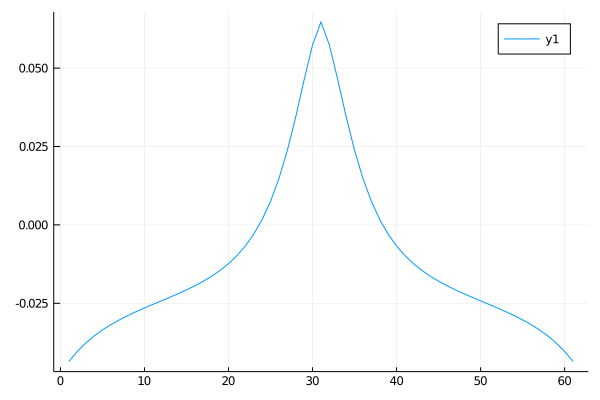

In [147]:
plot(real.(œách)[:,56])

In [15]:
usable_œâ = intersect(usable_sp, usable_ch);
rœásp = real.(œásp[usable_œâ,:]);
rœách = real.(œách[usable_œâ,:]);

## Testing NLsolve vs Roots

In [16]:
upper_lim = 1.2
testf!(F,Œª) = F[1]=construct_f(Œª[1], 0.0, rœásp, rœách, qMultiplicity, rhs=real(œáLocsp + œáLocch))
testf(Œªsp) = construct_f(Œªsp, 0.0, rœásp, rœách, qMultiplicity, rhs=real(œáLocsp + œáLocch))
res_nls = nlsolve(testf!, [upper_lim], autodiff = :forward)
Xsp = @interval(0.0,upper_lim)
res_roots = roots(testf, Xsp, Newton, 1e-10)
max_int = mid(maximum(interval.(res_roots)))

0.09675177839405225

## compute Œªsp(Œªch)

In [17]:
Œªch_range = -2:0.01:2
spOfch_max_nl = zeros(size(Œªch_range))
for (Œªi,Œªchi) in enumerate(Œªch_range)
    testf!(F,Œª) = F[1]=construct_f(Œª[1], Œªchi, rœásp, rœách, qMultiplicity, rhs=real(œáLocsp + œáLocch))
    res = nlsolve(testf!, [0.5], autodiff = :forward)
    spOfch_max_nl[Œªi] = res.zero[1]
end

In [144]:
Xsp = @interval(0.01,0.1)
Xch = @interval(-2,2)
Œªch_range_c1 = -6.0:0.3:6.0
Œªch_range2_c1 = -20:0.5:20
spOfch_max_int_c1 = zeros(size(Œªch_range_c1))
spOfch2_max_int_c1 = zeros(size(Œªch_range2_c1))
spOfch3_max_int_c1 = zeros(size(Œªch_range2_c1))

#for (Œªi,Œªchi) in enumerate(Œªch_range_c1)
#    testf(Œªsp) = construct_f(Œªsp, Œªchi, real.(œásp), real.(œách), qMultiplicity, rhs=real(œáLocsp + œáLocch))
#    res_internal = roots(testf, Xsp, Newton, 1e-5)
#    max_int = maximum(interval.(res_internal))
#    spOfch_max_int_c1[Œªi] = mid(max_int)
#    print("\r", Œªi, " of ", length(Œªch_range))
#end

for (Œªi,Œªchi) in enumerate(Œªch_range2_c1)
    testf(Œªsp) = construct_f(Œªsp, Œªchi, real.(œásp), real.(œách), qMultiplicity, rhs=real(œáLocsp + œáLocch))
    res_internal = roots(testf, Xsp, Newton, 1e-5)
    max_int = maximum(interval.(res_internal))
    spOfch2_max_int_c1[Œªi] = mid(max_int)
    print("\r", Œªi, " of ", length(Œªch_range2_c1))
end

for (Œªi,Œªchi) in enumerate(Œªch_range2_c1)
    testf(Œªsp) = construct_f(Œªsp, Œªchi, rœásp, rœách, qMultiplicity, rhs=real(œáLocsp + œáLocch))
    res_internal = roots(testf, Xsp, Newton, 1e-5)
    max_int = maximum(interval.(res_internal))
    spOfch3_max_int_c1[Œªi] = mid(max_int)
    print("\r", Œªi, " of ", length(Œªch_range2_c1))
end

81 of 81

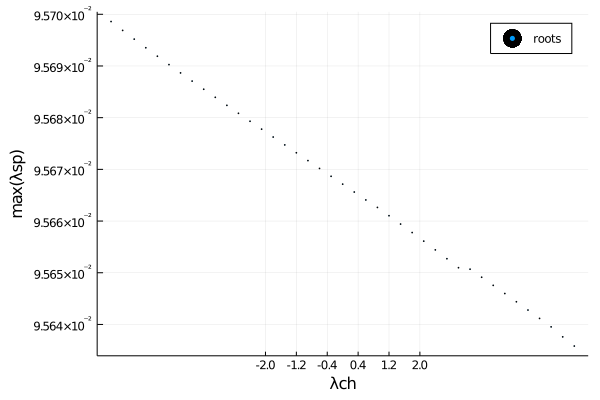

In [142]:
plot(Œªch_range_c1, spOfch_max_int_c1, label="roots", xlabel="Œªch", ylabel="max(Œªsp)", xticks = Œªch_range[1:80:end],seriestype = :scatter, markersize=0.8)
#plot!(Œªch_range, spOfch_max_nl, label="NLsolve", seriestype = :scatter, markersize=0.8)

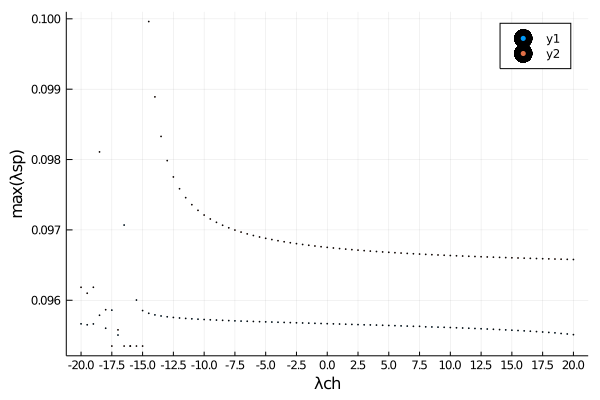

In [145]:
plot(Œªch_range2_c1[1:end], spOfch2_max_int_c1[1:end], xlabel="Œªch", ylabel="max(Œªsp)", xticks = Œªch_range2_c1[1:5:end],seriestype = :scatter, markersize=0.8)
plot!(Œªch_range2_c1[1:end], spOfch3_max_int_c1[1:end], xlabel="Œªch", ylabel="max(Œªsp)", xticks = Œªch_range2_c1[1:5:end],seriestype = :scatter, markersize=0.8)

#savefig("max_lambdasp_of_lambdach.pdf")

# Condition 2

## Full vs. Cut
### ToDo: justify one or the other

In [27]:
bubbleLoc = calc_bubble_fft(GImpSym, 1, modelParams, simParams);
œáspLoc, œáchLoc, _, _, trilexspLoc, trilexchLoc, _, _ =
        calc_œá_trilex(Œìsp, Œìch, bubbleLoc, [1], modelParams, simParams);
Œ£_ladderLoc_full = calc_DŒìA_Œ£_fft(œáspLoc, œáchLoc, trilexspLoc, trilexchLoc, bubbleLoc, GImpSym, FUpDo, 
                                           [1], 1:size(bubble,1), 1:simParams.n_iŒΩ, 1,
                                           modelParams, simParams, simParams.tail_corrected)
Œ£_ladderLoc_full = Œ£_ladderLoc_full .+ modelParams.n * modelParams.U/2.0;

Œ£_ladder_full = calc_DŒìA_Œ£_fft(œásp_Œª, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                                  qIndices, 1:size(bubble,1), 1:simParams.n_iŒΩ, simParams.Nk,
                                  modelParams, simParams, simParams.tail_corrected)
Œ£_ladder_full_corrected = Œ£_ladder_full .- Œ£_ladderLoc_full .+ Œ£_loc[eachindex(Œ£_ladderLoc_full)]

œásp_Œª = œá_Œª(œásp, 0.096757064296870768)
œách_Œª = œá_Œª(œách, 0.0)
mP = modelParams
sP = simParams
Œ£_Œª = calc_DŒìA_Œ£_fft(œásp_Œª, œách_Œª, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                    qIndices, usable_œâ, 1:simParams.n_iŒΩ, simParams.Nk,
                    modelParams, simParams, simParams.tail_corrected)
Œ£_Œª_corrected = Œ£_Œª .- Œ£_ladderLoc_cut .+ Œ£_loc[1:length(Œ£_ladderLoc_cut)]
E_Pot = calc_E_Pot(Œ£_Œª_corrected, œµkGrid_red, mP, sP)
[mP.U * sum(real.(œách_Œª[usable_œâ,:] .- œásp_Œª[usable_œâ,:])) ./ (mP.Œ≤*(sP.Nk^mP.D)); E_Pot]


MethodError: MethodError: no method matching cut_mirror(::Array{Float64,1})
Closest candidates are:
  cut_mirror(!Matched::Base.Iterators.ProductIterator) at /home/julian/Hamburg/ladderDGA_Julia/src/dispersion.jl:254
  cut_mirror(!Matched::Array{T,2}) where T at /home/julian/Hamburg/ladderDGA_Julia/src/dispersion.jl:255
  cut_mirror(!Matched::Array{T,3}) where T at /home/julian/Hamburg/ladderDGA_Julia/src/dispersion.jl:256

## Condition 2

In [28]:
@everywhere function calc_E_Pot(Œ£_ladder, œµkGrid_red, mP::ModelParameters, sP::SimulationParameters; weights=nothing)::Float64
    ŒΩGrid = 0:simParams.n_iŒΩ-1
    Œ£_hartree = mP.n * mP.U/2
    tail_corr_0 = 0.0
    tail_corr_inv_0 = mP.Œ≤ * Œ£_hartree/2
    tail_corr_1 = (mP.U^2 * 0.5 * mP.n * (1-0.5*mP.n) .+ Œ£_hartree .* (œµkGrid_red .+ Œ£_hartree .- mP.Œº))' ./ (iŒΩ_array(mP.Œ≤, 0:(sP.n_iŒΩ-1)) .^ 2)
    tail_corr_inv_1 = 0.5 * mP.Œ≤ * (mP.U^2 * 0.5 * mP.n * (1-0.5*mP.n) .+ Œ£_hartree .* (œµkGrid_red .+ Œ£_hartree .- mP.Œº))
    res = 0.0
    
    Œ£_ladder_corrected = Œ£_ladder.+ Œ£_hartree
    G_new = flatten_2D(G_from_Œ£(Œ£_ladder_corrected, œµkGrid_red, ŒΩGrid, mP));

    norm = (mP.Œ≤ * sP.Nk^mP.D)
    tmp = real.(G_new .* Œ£_ladder_corrected .+ tail_corr_0 .- tail_corr_1);
    if weights != nothing
        res = [sum( (2 .* sum(tmp[1:i,:], dims=[1])[1,:] .+ tail_corr_inv_0 .- tail_corr_inv_1 .* 0.5 .* mP.Œ≤) .* qMultiplicity) / norm for i in 1:sP.n_iŒΩ]
        res = fit_ŒΩsum(weights, res[(end-size(weights,2)+1):end])
    else
        res = sum( (2 .* sum(tmp, dims=[1])[1,:] .+ tail_corr_inv_0 .- tail_corr_inv_1 .* 0.5 .* mP.Œ≤) .* qMultiplicity) / norm 
    end
    return res
end


@everywhere function cond_Epot2(Œªsp, Œªch, œásp, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                   Œ£_loc, Œ£_ladderLoc, œµkGrid_red, qIndices, usable_œâ, usable_ŒΩ, mP, sP)
    œásp_Œª = œá_Œª(œásp, Œªsp)
    œách_Œª = œá_Œª(œách, Œªch)
    #println(Œªsp, ", ", Œªch)
    Œ£_Œª = calc_DŒìA_Œ£_fft(œásp_Œª, œách_Œª, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                         qIndices, usable_œâ, 1:simParams.n_iŒΩ, simParams.Nk,
                         modelParams, simParams, simParams.tail_corrected)
    Œ£_Œª_corrected = Œ£_Œª .- Œ£_ladderLoc .+ Œ£_loc[1:length(Œ£_ladderLoc)]
    E_Pot = calc_E_Pot(Œ£_Œª_corrected, œµkGrid_red, mP, sP)
    mP.U * sum(real.(œách_Œª[usable_œâ,:] .- œásp_Œª[usable_œâ,:])) ./ (mP.Œ≤*(sP.Nk^mP.D)) - E_Pot
end

function cond_Epot2_r(Œªsp, Œªch, œásp, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                   Œ£_loc, Œ£_ladderLoc, œµkGrid_red, qIndices, usable_œâ, usable_ŒΩ, mP, sP)
    œásp_Œª = œá_Œª(œásp, Œªsp)
    œách_Œª = œá_Œª(œách, Œªch)
    œásp_Œª2 = typeof(Œªsp) <: Interval ? œá_Œª(œásp, mid(Œªsp)) : œá_Œª(œásp, Œªsp)
    œách_Œª2 = typeof(Œªch) <: Interval ? œá_Œª(œách, mid(Œªch)) : œá_Œª(œách, Œªch)
    Œ£_Œª = calc_DŒìA_Œ£_fft(œásp_Œª2, œách_Œª2, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                         qIndices, usable_œâ, 1:simParams.n_iŒΩ, simParams.Nk,
                         modelParams, simParams, simParams.tail_corrected)
    Œ£_Œª_corrected = Œ£_Œª .- Œ£_ladderLoc .+ Œ£_loc[1:length(Œ£_ladderLoc)]
    E_Pot = calc_E_Pot(Œ£_Œª_corrected, œµkGrid_red, mP, sP)
    mP.U * sum(real.(œách_Œª[usable_œâ,:] .- œásp_Œª[usable_œâ,:])) ./ (mP.Œ≤*(sP.Nk^mP.D)) - E_Pot
end

@everywhere function cond_Epot2_overview(Œªsp, Œªch, œásp, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                   Œ£_loc, Œ£_ladderLoc, œµkGrid_red, qIndices, usable_œâ, usable_ŒΩ, mP, sP)
    œásp_Œª = œá_Œª(œásp, Œªsp)
    œách_Œª = œá_Œª(œách, Œªch)
    Œ£_Œª = calc_DŒìA_Œ£_fft(œásp_Œª, œách_Œª, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                         qIndices, usable_œâ, 1:simParams.n_iŒΩ, simParams.Nk,
                         modelParams, simParams, simParams.tail_corrected)
    Œ£_Œª_corrected = Œ£_Œª .- Œ£_ladderLoc .+ Œ£_loc[1:length(Œ£_ladderLoc)]
    E_Pot = calc_E_Pot(Œ£_Œª_corrected, œµkGrid_red, mP, sP)
    [mP.U * sum(real.(œách_Œª[usable_œâ,:] .- œásp_Œª[usable_œâ,:])) ./ (mP.Œ≤*(sP.Nk^mP.D)); E_Pot]
end

In [29]:

Œªch_range_c2 = -6.0:0.3:6.0
Œªsp_range_c2 = 0.095:0.0001:0.096
rhs_overview = SharedArray{Float64,2}((length(Œªch_range_c2),length(Œªsp_range_c2)));
lhs_overview = SharedArray{Float64,2}((length(Œªch_range_c2),length(Œªsp_range_c2)));

In [96]:
Œªch_range_c2 = -3.0:0.1:3.0
#Œªch_range2_c2 = -20:0.5:20
#Œªch_range = -4.0:0.5:4.0
Œªsp_range_c2 = 0.09:0.0002:0.1
#Œªch_range = -4.0:0.05:4.0
#Œªsp_range = 0.022:0.00001:0.023
rhs_overview = SharedArray{Float64,2}((length(Œªch_range_c2),length(Œªsp_range_c2)));
lhs_overview = SharedArray{Float64,2}((length(Œªch_range_c2),length(Œªsp_range_c2)));

@everywhere overview_f(Œªsp, Œªch) = cond_Epot2_overview(Œªsp, Œªch, œásp, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                       Œ£_loc, Œ£_ladderLoc_cut, œµkGrid_red, qIndices, usable_œâ, 1:simParams.n_iŒΩ, 
                       modelParams, simParams)
for i in 1:length(Œªch_range_c2)
    Œªch_i = Œªch_range_c2[i]
    for (j,Œªsp_i) in enumerate(Œªsp_range_c2)
        tmp = overview_f(Œªsp_i,Œªch_i)
        lhs_overview[i,j] = tmp[1]
        rhs_overview[i,j] = tmp[2]
        print("\r", i, " ", j, " of ",length(Œªch_range_c2),", ",length(Œªsp_range_c2))
    end
end

61 51 of 61, 51

In [54]:
#save("cond_2_data.jld", "lhs", lhs_overview ./ 2, "rhs", rhs_overview)

In [98]:
lhs_overview

61√ó51 SharedArray{Float64,2}:
 -0.0176687  -0.0165597  -0.0153747  ‚Ä¶  -0.0689929  -0.0675073  -0.0661434
 -0.0176787  -0.0165698  -0.0153848     -0.069003   -0.0675173  -0.0661534
 -0.0176887  -0.0165797  -0.0153947     -0.0690129  -0.0675273  -0.0661634
 -0.0176985  -0.0165896  -0.0154046     -0.0690228  -0.0675371  -0.0661732
 -0.0177082  -0.0165993  -0.0154143     -0.0690325  -0.0675468  -0.066183
 -0.0177179  -0.0166089  -0.0154239  ‚Ä¶  -0.0690421  -0.0675565  -0.0661926
 -0.0177274  -0.0166184  -0.0154335     -0.0690517  -0.067566   -0.0662021
 -0.0177368  -0.0166279  -0.0154429     -0.0690611  -0.0675754  -0.0662115
 -0.0177461  -0.0166372  -0.0154522     -0.0690704  -0.0675847  -0.0662209
 -0.0177554  -0.0166464  -0.0154614     -0.0690796  -0.067594   -0.0662301
 -0.0177645  -0.0166556  -0.0154706  ‚Ä¶  -0.0690888  -0.0676031  -0.0662392
 -0.0177735  -0.0166646  -0.0154796     -0.0690978  -0.0676122  -0.0662483
 -0.0177825  -0.0166736  -0.0154886     -0.0691068  -0.0676211  

In [99]:
rhs_overview

61√ó51 SharedArray{Float64,2}:
 0.168155  0.170535  0.173002  0.175571  ‚Ä¶  0.158227  0.160506  0.162669
 0.16817   0.17055   0.173017  0.175586     0.158242  0.160522  0.162685
 0.168185  0.170565  0.173032  0.175601     0.158258  0.160537  0.1627
 0.1682    0.170579  0.173047  0.175615     0.158273  0.160552  0.162715
 0.168214  0.170594  0.173061  0.175629     0.158288  0.160567  0.16273
 0.168229  0.170608  0.173075  0.175644  ‚Ä¶  0.158303  0.160582  0.162745
 0.168243  0.170622  0.173089  0.175658     0.158318  0.160597  0.16276
 0.168257  0.170636  0.173103  0.175672     0.158333  0.160612  0.162775
 0.168271  0.17065   0.173117  0.175685     0.158347  0.160626  0.162789
 0.168285  0.170664  0.173131  0.175699     0.158362  0.160641  0.162803
 0.168298  0.170678  0.173144  0.175712  ‚Ä¶  0.158376  0.160655  0.162817
 0.168312  0.170691  0.173158  0.175726     0.15839   0.160669  0.162831
 0.168325  0.170704  0.173171  0.175739     0.158404  0.160683  0.162845
 ‚ãÆ              

In [100]:
lhs_overview .- rhs_overview

61√ó51 Array{Float64,2}:
 -0.185823  -0.187094  -0.188377  ‚Ä¶  -0.22722   -0.228013  -0.228812
 -0.185849  -0.18712   -0.188402     -0.227245  -0.228039  -0.228838
 -0.185874  -0.187144  -0.188427     -0.227271  -0.228064  -0.228864
 -0.185898  -0.187169  -0.188451     -0.227296  -0.228089  -0.228889
 -0.185922  -0.187193  -0.188475     -0.227321  -0.228114  -0.228913
 -0.185946  -0.187217  -0.188499  ‚Ä¶  -0.227345  -0.228139  -0.228938
 -0.18597   -0.187241  -0.188523     -0.22737   -0.228163  -0.228962
 -0.185994  -0.187264  -0.188546     -0.227394  -0.228187  -0.228986
 -0.186017  -0.187287  -0.188569     -0.227418  -0.228211  -0.22901
 -0.18604   -0.18731   -0.188592     -0.227441  -0.228235  -0.229033
 -0.186063  -0.187333  -0.188615  ‚Ä¶  -0.227465  -0.228258  -0.229057
 -0.186085  -0.187356  -0.188637     -0.227488  -0.228281  -0.22908
 -0.186108  -0.187378  -0.18866      -0.227511  -0.228304  -0.229102
  ‚ãÆ                               ‚ã±                         ‚ãÆ
 -0.18

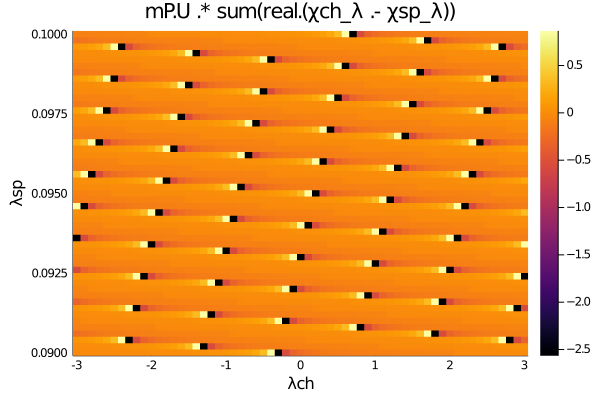

In [101]:
heatmap(Œªch_range_c2, Œªsp_range_c2, lhs_overview, xlabel="Œªch", ylabel="Œªsp", title="mP.U .* sum(real.(œách_Œª .- œásp_Œª))")
#savefig("lhs.pdf")

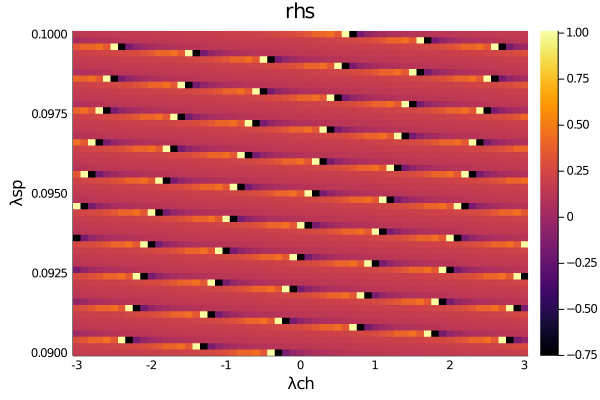

In [102]:
heatmap(Œªch_range_c2, Œªsp_range_c2, rhs_overview, xlabel="Œªch", ylabel="Œªsp", title="rhs")
#savefig("rhs.pdf")

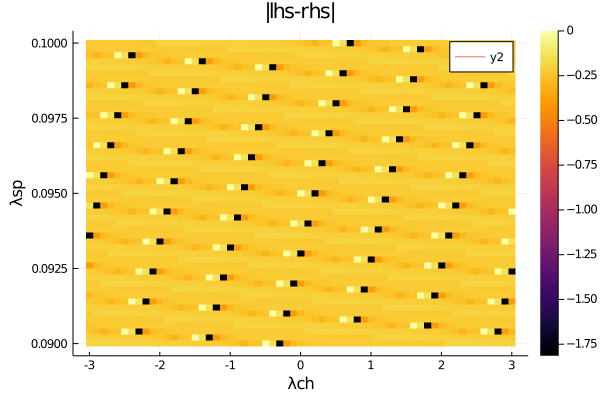

In [103]:
heatmap(Œªch_range_c2, Œªsp_range_c2, lhs_overview .- rhs_overview, xlabel="Œªch", ylabel="Œªsp", title="|lhs-rhs|")
#savefig("lhs_rhs.pdf")
plot!([0.095])

In [104]:
writedlm("cond2.csv",  lhs_overview .- rhs_overview, ' ')

In [141]:
arr_tmp = lhs_overview .- rhs_overview
open("cond2_2.txt", "w") do f
    for i in 1:size(arr_tmp,1)
        for j in 1:size(arr_tmp,2)
            @printf(f, "  %18.10f  %18.10f  %18.10f\n", Œªch_range_c2[i] , Œªsp_range_c2[j], arr_tmp[i,j])

            #str = string(Œªch_range_c2[i] ,"\t", Œªsp_range_c2[j] , "\t", arr_tmp[i,j], "\n")
            #write(io, str)
            #println(str)
        end
        @printf(f, "\n")
    end
end

In [133]:
abs.(arr_tmp)[:,25:end]

61√ó27 Array{Float64,2}:
 0.245388  0.000368725  0.13659   1.81385  ‚Ä¶  0.22722   0.228013  0.228812
 0.24543   0.0003051    0.136805  1.81387     0.227245  0.228039  0.228838
 0.245472  0.000242123  0.137018  1.81388     0.227271  0.228064  0.228864
 0.245513  0.000179786  0.137228  1.8139      0.227296  0.228089  0.228889
 0.245554  0.000118075  0.137436  1.81392     0.227321  0.228114  0.228913
 0.245594  5.6982e-5    0.137642  1.81394  ‚Ä¶  0.227345  0.228139  0.228938
 0.245634  3.505e-6     0.137845  1.81396     0.22737   0.228163  0.228962
 0.245673  6.33957e-5   0.138047  1.81398     0.227394  0.228187  0.228986
 0.245712  0.0001227    0.138246  1.81399     0.227418  0.228211  0.22901
 0.245751  0.000181428  0.138443  1.81401     0.227441  0.228235  0.229033
 0.245789  0.000239589  0.138638  1.81403  ‚Ä¶  0.227465  0.228258  0.229057
 0.245826  0.000297191  0.138831  1.81404     0.227488  0.228281  0.22908
 0.245864  0.000354245  0.139022  1.81406     0.227511  0.228304  0.229

In [138]:
abs.(arr_tmp)[3,26]

0.0002421233419692692

In [140]:
c2_zeros_ind = findall(x -> x < 0.005, abs.(arr_tmp))

61-element Array{CartesianIndex{2},1}:
 CartesianIndex(1, 26)
 CartesianIndex(2, 26)
 CartesianIndex(3, 26)
 CartesianIndex(4, 26)
 CartesianIndex(5, 26)
 CartesianIndex(6, 26)
 CartesianIndex(7, 26)
 CartesianIndex(8, 26)
 CartesianIndex(9, 26)
 CartesianIndex(10, 26)
 CartesianIndex(11, 26)
 CartesianIndex(12, 26)
 CartesianIndex(13, 26)
 ‚ãÆ
 CartesianIndex(50, 26)
 CartesianIndex(51, 26)
 CartesianIndex(52, 26)
 CartesianIndex(53, 26)
 CartesianIndex(54, 26)
 CartesianIndex(55, 26)
 CartesianIndex(56, 26)
 CartesianIndex(57, 26)
 CartesianIndex(58, 26)
 CartesianIndex(59, 26)
 CartesianIndex(60, 26)
 CartesianIndex(61, 26)

In [120]:
Œªsp_range_c2[26]

0.095

In [126]:
Œªch_range_c2[1:25]

-3.0:0.1:-0.6

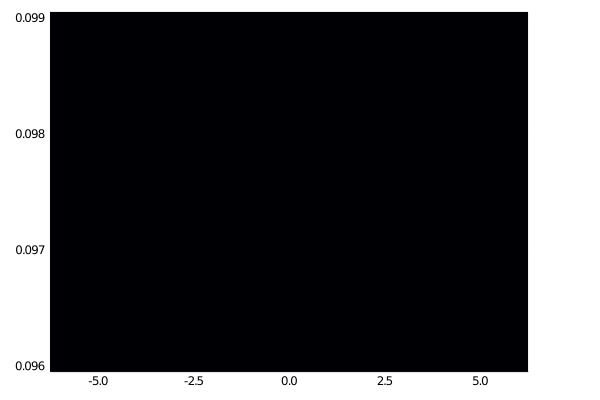

GKS: Possible loss of precision in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


In [47]:
heatmap(Œªch_range_c2, Œªsp_range_c2, sign.(lhs_overview .- rhs_overview))

In [135]:
spOfch_max_int_c2 = zeros(length(spOfch_max_int))
spOfch2_max_int_c2 = zeros(length(spOfch2_max_int))


for (Œªi,(Œªchi, Œªspi)) in enumerate(zip(Œªch_range_c1, spOfch_max_int_c1))
    E_Poti = cond_Epot2(Œªspi, Œªchi, œásp, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                       Œ£_loc, Œ£_ladderLoc_cut, œµkGrid_red, qIndices, usable_œâ, 1:simParams.n_iŒΩ, 
                       modelParams, simParams)
    spOfch_max_int_c2[Œªi] = E_Poti
    print("\r", Œªi, " of ", length(spOfch2_c2_max_int))
end

for (Œªi,(Œªchi, Œªspi)) in enumerate(zip(Œªch_range2_c1, spOfch2_max_int_c1))
    E_Poti = cond_Epot2(Œªspi, Œªchi, œásp, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                       Œ£_loc, Œ£_ladderLoc_cut, œµkGrid_red, qIndices, usable_œâ, 1:simParams.n_iŒΩ, 
                       modelParams, simParams)
    spOfch2_max_int_c2[Œªi] = E_Poti
    print("\r", Œªi, " of ", length(spOfch2_c2_max_int))
end

81 of 81

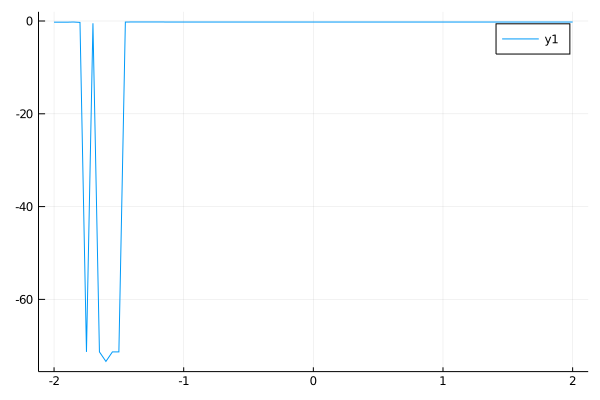

In [138]:
plot(Œªch_range_c1, spOfch2_max_int_c2)

In [144]:
using Roots

Xsp = @interval(0.09,0.1)
Xch = @interval(-2,2)
Œªch_range_c2 = -2:0.05:2
Œªch_range2_c2 = -20:0.5:20
spOfch_max_int_c2 = zeros(size(Œªch_range_c1))
spOfch2_max_int_c2 = zeros(size(Œªch_range2_c1))

for (Œªi,Œªchi) in enumerate(Œªch_range_c1)
    testf2(Œªsp) = cond_Epot2_r(Œªsp, Œªchi, œásp, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                       Œ£_loc, Œ£_ladderLoc_cut, œµkGrid, qIndices, usable_œâ, 1:simParams.n_iŒΩ, 
                       modelParams, simParams)
    spOfch_max_int_c2[Œªi] = mid(max_int)
    print("\r", Œªi, " of ", length(Œªch_range))
end

for (Œªi,Œªchi) in enumerate(Œªch_range2_c1)
    testf2(Œªsp) = cond_Epot2_r(Œªsp, Œªchi, œásp, œách, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                   Œ£_loc, Œ£_ladderLoc_cut, œµkGrid, qIndices, usable_œâ, 1:simParams.n_iŒΩ, 
                   modelParams, simParams)
    spOfch2_max_int_c2[Œªi] = mid(max_int)
    print("\r", Œªi, " of ", length(Œªch_range2))
end

81 of 81

# Both conditions

In [156]:
function cond_both(Œªsp, Œªch, œásp, œách, trilexsp, trilexch, bubble, GLoc, GLoc_fft, FUpDo, 
                   Œ£_loc, Œ£_ladderLoc, rhs, œµkGrid, qIndices, usable_œâ, usable_ŒΩ, mP, sP)
    œásp_Œª = œá_Œª(œásp, Œªsp)[usable_œâ,:]
    œách_Œª = œá_Œª(œách, Œªch)[usable_œâ,:]
    println(Œªsp, " ", Œªch)
    œásp_Œª2 = typeof(Œªsp) <: Interval ? œá_Œª(œásp, mid(Œªsp)) : œá_Œª(œásp, Œªsp)
    œách_Œª2 = typeof(Œªch) <: Interval ? œá_Œª(œách, mid(Œªch)) : œá_Œª(œách, Œªch)
    Œ£_Œª = calc_DŒìA_Œ£_fft(œásp_Œª2, œách_Œª2, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                         œµkGrid, qIndices, (1:(2*simParams.n_iœâ+1)), 1:simParams.n_iŒΩ, simParams.Nk,
                         modelParams, simParams, simParams.tail_corrected)
    Œ£_Œª_corrected = Œ£_Œª .- Œ£_ladderLoc .+ Œ£_loc[1:length(Œ£_ladderLoc)]
    r1 =  sum(sum(œách_Œª .+ œásp_Œª, dims=1)[1,:] .* qMultiplicity) ./ (modelParams.Œ≤*sum(qMultiplicity)) - rhs
    E_Pot = calc_E_Pot(Œ£_Œª_corrected, œµkGrid, mP, sP)
    r2 = mP.U * sum(real.(œách_Œª .- œásp_Œª)) ./ (mP.Œ≤*(sP.Nk^mP.D)) - E_Pot
    return SVector(r1, r2)
end


function cond_both_r!(F, Œª, œásp, œách, trilexsp, trilexch, bubble, GLoc, GLoc_fft, FUpDo, 
                   Œ£_loc, Œ£_ladderLoc, rhs, œµkGrid, qIndices, usable_œâ, usable_ŒΩ, mP, sP)
    œásp_Œª = œá_Œª(œásp, Œª[1])[usable_œâ,:]
    œách_Œª = œá_Œª(œách, Œª[2])[usable_œâ,:]
    println(Œª)
    œásp_Œª2 = typeof(Œª[1]) <: Interval ? œá_Œª(œásp, mid(Œª[1])) : œá_Œª(œásp, Œª[1])
    œách_Œª2 = typeof(Œª[2]) <: Interval ? œá_Œª(œách, mid(Œª[2])) : œá_Œª(œách, Œª[2])
    Œ£_Œª = calc_DŒìA_Œ£_fft(œásp_Œª2, œách_Œª2, trilexsp, trilexch, bubble, GLoc_fft, FUpDo, 
                         œµkGrid, qIndices, (1:(2*simParams.n_iœâ+1)), 1:simParams.n_iŒΩ, simParams.Nk,
                         modelParams, simParams, simParams.tail_corrected)
    Œ£_Œª_corrected = Œ£_Œª .- Œ£_ladderLoc .+ Œ£_loc[1:length(Œ£_ladderLoc)]
    E_Pot = calc_E_Pot(Œ£_Œª_corrected, œµkGrid, mP, sP)
    F[1] = sum(sum(real.(œách_Œª .+ œásp_Œª), dims=1)[1,:] .* qMultiplicity) ./ (modelParams.Œ≤*sum(qMultiplicity)) - rhs
    F[2] = mP.U * sum(real.(œách_Œª .- œásp_Œª)) ./ (mP.Œ≤*(sP.Nk^mP.D)) - E_Pot
end

cond_both_r! (generic function with 1 method)

In [149]:
Xsp = @interval(0.09,0.1)
Xch = @interval(-2,2)
Œªch_range_c2 = -0.2:0.05:0.2 #0.2
Œªch_range2_c2 = -20:0.2:20 #0.2
spOfch_max_int_c2 = zeros(size(Œªch_range_c2))
testf3((Œªsp, Œªch)) = cond_both(Œªsp, Œªch, rœásp, rœách, trilexsp, trilexch, bubble, GLoc, GLoc_fft, FUpDo, 
                           Œ£_loc, Œ£_ladderLoc_full, real(œáLocsp + œáLocch), œµkGrid, qIndices, 1:size(bubble,1), 1:simParams.n_iŒΩ, 
                           modelParams, simParams)
res_internal = roots(testf3, Xsp √ó Xch, IntervalRootFinding.Bisection, 1e-2)

BoundsError: BoundsError: attempt to access 9√ó56 Array{Interval{Float64},2} at index [1:61, Base.Slice(Base.OneTo(56))]

In [158]:
testf3!(F,Œª) = cond_both_r!(F, Œª, œásp, œách, trilexsp, trilexch, bubble, GLoc, GLoc_fft, FUpDo, 
                           Œ£_loc, Œ£_ladderLoc_full, real(œáLocsp + œáLocch), œµkGrid_red, qIndices, 1:size(bubble,1), 1:simParams.n_iŒΩ, 
                           modelParams, simParams)
res_nls = nlsolve(testf3!, [0.096,0.1], method = :trust_region)

[0.096, 0.1]
[0.0960060554544524, 0.1]
[0.0959939445455476, 0.1]
[0.096, 0.1000060554544524]
[0.096, 0.09999394454554761]
[0.09801769787564481, -130.8958046889515]
[0.09801769787564481, -130.8958046889515]
[0.0980237533300972, -130.8958046889515]
[0.09801164242119241, -130.8958046889515]
[0.09801769787564481, -130.8950120553682]
[0.09801769787564481, -130.8965973225348]
[-0.1348204540870308, 110.74526102543453]
[-0.10877189505983545, 81.87841454065818]
[-0.007333344100511424, -30.535138743569277]
[0.04355314993854098, -86.92722592352459]
[0.06934081319474814, -115.5049493838073]
[0.08301829383558637, -130.66224593696288]
[0.08301829383558637, -130.66224593696288]
[0.08302434929003877, -130.66224593696288]
[0.08301223838113397, -130.66224593696288]
[0.08301829383558637, -130.66145471768397]
[0.08301829383558637, -130.66303715624178]
[0.06710834714231764, -133.18548017897635]
[0.06823517963648931, -135.35109360874398]
[0.07707139719917473, -139.09431765153087]
[0.07707139719917473, -139.

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.096, 0.1]
 * Zero: [0.07520747764264664, -142.35679212852952]
 * Inf-norm of residuals: 0.000000
 * Iterations: 33
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 29
 * Jacobian Calls (df/dx): 13

In [36]:
nh       = ceil(Int64, size(usable_œâ,1)/2)
œásp_min    = -minimum(real.(1 ./ œásp[usable_œâ[nh],:]))
œách_min    = -minimum(real.(1 ./ œách[usable_œâ[nh],:]))
println("œásp_min: $(œásp_min)\nœách_min: $(œách_min)")

œásp_min: 0.02205518884088588
œách_min: -17.932849444809275


In [66]:
Xsp = @interval(-2,2)
Xch = @interval(-20,1)
Œªsp_range = -1:0.02:1
resi = zeros(size(Œªsp_range))
resi2 = zeros(size(Œªsp_range))
rœá_sp = real.(œásp[usable_œâ,:])
rœá_ch = real.(œách[usable_œâ,:])
for (Œªi,Œªsp) in enumerate(Œªsp_range)
    testf(Œªch) = construct_f(Œªsp, Œªch, rœá_sp, rœá_ch, qMultiplicity, rhs=real(œáLocsp + œáLocch))
    res_internal = roots(testf, Xch, Newton, 1e-8)
    max_int = maximum(interval.(res_internal))
    min_int = minimum(interval.(res_internal))
    resi[Œªi] = mid(max_int)
    resi2[Œªi] = mid(min_int)
    print("\r", Œªi, " of ", length(Œªsp_range))
end

101 of 101

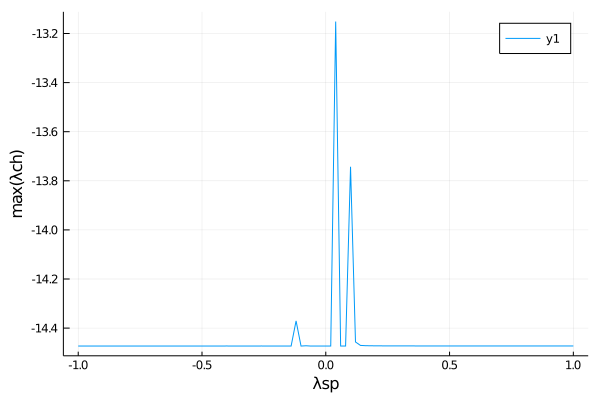

In [67]:
plot(Œªsp_range[1:end], resi[1:end], xlabel="Œªsp", ylabel="max(Œªch)")
#savefig("max_lambdach_of_lambdasp.pdf")

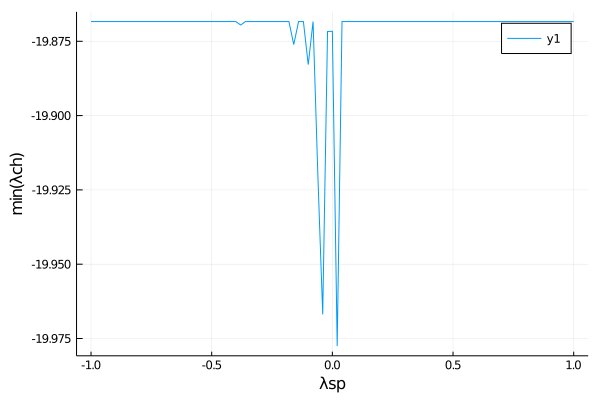

In [68]:
plot(Œªsp_range[1:end], resi2[1:end], xlabel="Œªsp", ylabel="min(Œªch)")
#savefig("min_lambdach_of_lambdasp.pdf")

In [69]:
res2 = interval.(res)
res3 = mid.(res2)
res4 = map(x -> [x[1], x[2]], res3)
res5 = collect(transpose(hcat(res4...)));

BoundsError: BoundsError

In [70]:
Œªch_range2 = -0.6:0.01:0.6
Œªsp_range2 = -0.5:0.01:0.5
res2 = zeros(length(Œªch_range2), length(Œªsp_range2))
œârange = intersect(usable_ch, usable_sp)

for (i,Œªch_i) in enumerate(Œªch_range2)
    for (j,Œªsp_i) in enumerate(Œªsp_range2)
        res2[i,j] = construct_f( (Œªch_i, Œªsp_i),œách[œârange,:], œásp[œârange,:])  
    end
end

MethodError: MethodError: no method matching construct_f(::Tuple{Float64,Float64}, ::Array{Complex{Float64},2}, ::Array{Complex{Float64},2})
Closest candidates are:
  construct_f(::Any, ::Any, ::Any, !Matched::Any, !Matched::Any; rhs) at In[21]:18

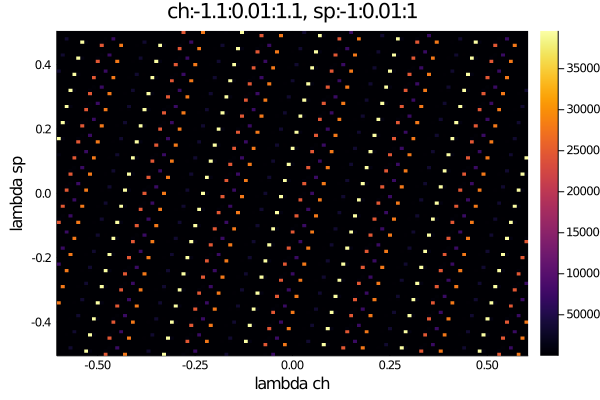

In [217]:
heatmap(Œªch_range2, Œªsp_range2, (res2 .- 0).^4, xlabel = "lambda ch", ylabel = "lambda sp", title="ch:-1.1:0.01:1.1, sp:-1:0.01:1")

In [349]:
œá_min_ch    = -minimum(1 ./ real.(œách[ceil(Int64,size(œách,1)/2),:]))
œá_min_sp    = -minimum(1 ./ real.(œásp[ceil(Int64,size(œách,1)/2),:]))
println(œá_min_ch, ", ", œá_min_sp)

-14.473154939042681, 0.09308725343569026


In [375]:
Xint = 0..1.1
fsp(Œªsp) =  construct_f(0.0, Œªsp, œách[œârange,:], œásp[œârange,:], qMultiplicity, rhs = rhs)
res_sp = IntervalRootFinding.roots(fsp, Xint, Newton, 1e-5)  
println(sort(interval.(res_sp)))
println(maximum(interval.(res_sp)))

Interval{Float64}[[0.0103389, 0.010339], [0.0143941, 0.0144021], [0.0225144, 0.0225147], [0.0236029, 0.023608], [0.0289026, 0.0289106], [0.0387014, 0.0387016], [0.049588, 0.0495966], [0.0626939, 0.062694], [0.0709535, 0.0709617], [0.0833816, 0.0833819], [0.0930821, 0.0930906], [0.0952014, 0.0952076]]
[0.0952014, 0.0952076]


In [377]:
Xint = (œá_min_ch-0.5)..(œá_min_ch+0.5)
œá_min_ch = -minimum(1 ./ real.(œách[floor(Int64,size(œách,1)/2),:]))
fch(Œªch) =  construct_f(Œªch, 0.0, œách[œârange,:], œásp[œârange,:], qMultiplicity, rhs = rhs)
res_ch = IntervalRootFinding.roots(fch, Xint)  
println(sort(interval.(res_ch)))
println(maximum(interval.(res_ch)))

Interval{Float64}[[227.512, 227.513], [227.514, 227.515]]
[227.514, 227.515]


In [333]:
Xint = -2..2
Œªch_range = -15:0.1:-14
œá_min_ch    = -minimum(1 ./ real.(œách[floor(Int64,size(œách,1)/2),:]))
res = zeros(length(Œªch_range))
for (i,Œªch_i) in enumerate(-15:0.1:-14)
    fsp_int(Œªsp) =  construct_f(Œªch_i, Œªsp, œách[œârange,:], œásp[œârange,:], qMultiplicity, rhs = rhs)
    res_sp = IntervalRootFinding.roots(fsp_int, Xint, Newton, 1e-3)
    res_sp_sort = sort(interval.(res_sp))
    println(res_sp_sort)
    res[i] = mid(maximum(interval.(res_sp)))
    println(i)
end

Interval{Float64}[[-0.656976, -0.65666], [-0.645462, -0.644907], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347508], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.30

Interval{Float64}[[-0.617177, -0.617105], [-0.614462, -0.614187], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.348871, -0.347909], [-0.34791, -0.347435], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.3

Interval{Float64}[[-0.615255, -0.614461], [-0.6068, -0.606756], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.348871, -0.347909], [-0.347414, -0.346933], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.30

Interval{Float64}[[-0.668343, -0.667733], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347527], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.3

Interval{Float64}[[-0.709881, -0.709333], [-0.707951, -0.707624], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347586], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.3

Interval{Float64}[[-0.738249, -0.738186], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400529, -0.400028], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347621], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.3

In [334]:
res

11-element Array{Float64,1}:
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237

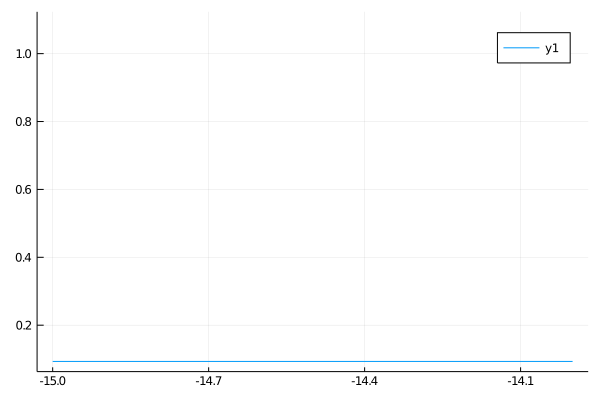

In [335]:
plot(Œªch_range, res)

In [310]:
Xint = -20..20
function f_full( (Œªch, Œªsp) ) 
    r = construct_f(Œªch, Œªsp, œách[œârange,:], œásp[œârange,:], qMultiplicity, rhs = rhs)
    return SVector(r,r)
end

function test( (Œªch, Œªsp) ) 
    r = Œªch + Œªsp
    return SVector(r,r)
end
    
res = IntervalRootFinding.roots(f_full, Xint √ó Xint, Newton, 1e-1)  
#println(sort(interval.(res)))
#println(maximum(interval.(res)))

InterruptException: InterruptException:

In [67]:
include("src/ladderDGA_Julia.jl")
include("test/loadFortranData.jl")

loadFortranData (generic function with 1 method)